# Steady flow through a cylinder array at an angle ($Re=40$)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1 = ib.stretching(192, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
s2 = ib.stretching(96, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
x = np.concatenate([-s2[::-1], s1[1:]])

s = ib.stretching(31, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
y = np.concatenate([-s[::-1], s[1:]])

solver = ib.Solver(x, y, periodic=True, iRe=1/40.0, Co=0.5)

In [4]:
(len(y)-1)/3

20.0

## Immersed boundaries

In [5]:
solver.set_solids(ib.shapes.cylinder("cylinder", 0, 0, 0.5, solver.dxmin))

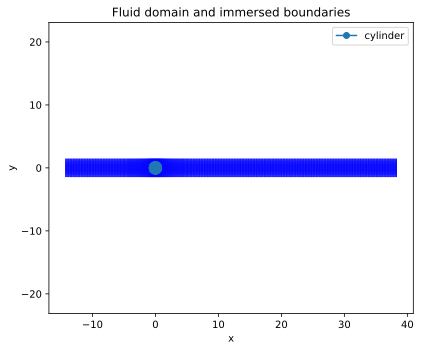

In [6]:
solver.plot_domain(figsize=(6, 5))

## Boundary conditions

In [7]:
uBC, vBC = solver.zero_boundary_conditions()

α = 30*np.pi/180
for k in range(2):
    uBC[k][:] = np.cos(α)
    vBC[k][:] = np.sin(α)

sBC = ((np.zeros(solver.solids[0].l), np.zeros(solver.solids[0].l)), )

## Steady simulation

In [8]:
x = solver.zero(); 
x[:solver.fluid.u.size] = np.cos(α)
x[solver.fluid.u.size:solver.fluid.v.size] = np.sin(α)

In [9]:
%time x, infodict = solver.steady_state(x, uBC, vBC, sBC, outflowEast=False)

   k   residual_x   residual_f  cylinder_fx  cylinder_fy 
   1  7.68623e-01  6.73679e+00  3.69945e+00  2.29115e+00 
   2  5.81176e-01  5.83102e-01  2.64744e+00  9.34813e-01 
   3  7.34714e-01  6.96481e-01  2.78540e+00  1.08092e+00 
   4  6.93956e-01  7.69714e-01  2.80481e+00  1.06167e+00 
   5  1.51710e-01  1.15792e-01  2.80551e+00  1.06121e+00 
   6  6.02766e-02  7.82402e-02  2.80551e+00  1.06121e+00 
   7  9.11921e-03  1.00134e-02  2.80551e+00  1.06121e+00 
   8  4.32790e-04  3.62145e-04  2.80551e+00  1.06121e+00 
   9  9.30542e-07  7.01875e-07  2.80551e+00  1.06121e+00 
  10  4.50870e-12  3.53055e-12  2.80551e+00  1.06121e+00 
CPU times: user 17.4 s, sys: 551 ms, total: 18 s
Wall time: 4.72 s


In [10]:
%time x = solver.steady_state(x, uBC, vBC, sBC, outflowEast=True)[0]

   k   residual_x   residual_f  cylinder_fx  cylinder_fy 
   1  1.62805e-15  9.27348e-15  2.80551e+00  1.06121e+00 
CPU times: user 1.78 s, sys: 44.3 ms, total: 1.82 s
Wall time: 460 ms


## Display results

Display velocity field and pressure

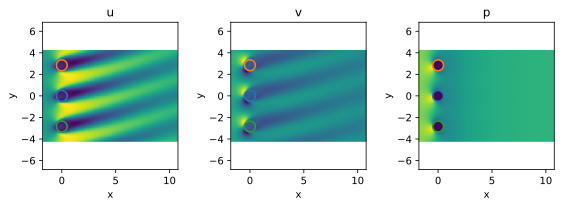

In [11]:
solver.plot_field(x, xlim=(-1, 10), ylim=(-4, 4))

Show convergence history

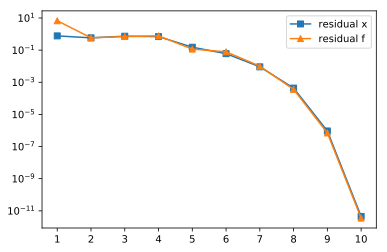

In [12]:
from matplotlib.ticker import MaxNLocator
k = np.arange(1, len(infodict['residual_x'])+1)
plt.semilogy(k, infodict['residual_x'], 's-', label='residual x')
plt.semilogy(k, infodict['residual_f'], '^-', label='residual f')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()